#Subject: Data Science with Python #Name: Anubhab Chaudhuri #Sec: B #Roll: 108

Data acquisition with real life case study

Problem Statement: Extract Amazon data set (preferably from your own Amazon account). Perform data pre-processing, encoding, and feature scaling on the data set using Python. Statistical properties of the data set must be considered and evaluated. Write a project where the following must be defined (Follow the video tutorial):

Data Science concept and general working methodology. Need of Data Data acquisition considerations Challenges faced during data acquisition
Data Extraction Methodology.
Data Statistics.
Data Pre-processing techniques applied.
Encoding and Feature Scaling techniques used.
Concept of data type casting and outliers.

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
s=pd.read_csv(r"C:\Users\Anubhab\amazon_order_history.csv")
s

,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,404-9607175-0534741,Seagate Expansion 1TB External HDD - 6.35 cm (...,Anubhab Chaudhuri,2022-09-09,"Rs.4,099.00",Rs. 40.00,0,0,0,0,UNKNOWN;
1,404-7642633-6972349,Vrnda Women's Printed Cotton Night Suit Set/Sl...,Anubhab Chaudhuri,2022-05-14,Rs.597.00,Rs. 40.00,0,0,0,0,UNKNOWN;
2,404-8392830-0735545,boAt Airdopes 141 True Wireless Earbuds with 4...,Anubhab Chaudhuri,2022-03-17,"Rs.1,399.00",Rs. 40.00,0,0,0,0,UNKNOWN;
3,"=SUBTOTAL(103, A2:A4) & "" items""",NaN,NaN,NaN,"=SUBTOTAL(109,E2:E4)","=SUBTOTAL(109,F2:F4)","=SUBTOTAL(109,G2:G4)","=SUBTOTAL(109,H2:H4)","=SUBTOTAL(109,I2:I4)","=SUBTOTAL(109,J2:J4)",NaN


In [218]:
s

,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,404-9607175-0534741,Seagate Expansion 1TB External HDD - 6.35 cm (...,Anubhab Chaudhuri,2022-09-09,"Rs.4,099.00",Rs. 40.00,0,0,0,0,UNKNOWN;
1,404-7642633-6972349,Vrnda Women's Printed Cotton Night Suit Set/Sl...,Anubhab Chaudhuri,2022-05-14,Rs.597.00,Rs. 40.00,0,0,0,0,UNKNOWN;
2,404-8392830-0735545,boAt Airdopes 141 True Wireless Earbuds with 4...,Anubhab Chaudhuri,2022-03-17,"Rs.1,399.00",Rs. 40.00,0,0,0,0,UNKNOWN;
3,"=SUBTOTAL(103, A2:A4) & "" items""",NaN,NaN,NaN,"=SUBTOTAL(109,E2:E4)","=SUBTOTAL(109,F2:F4)","=SUBTOTAL(109,G2:G4)","=SUBTOTAL(109,H2:H4)","=SUBTOTAL(109,I2:I4)","=SUBTOTAL(109,J2:J4)",NaN


In [219]:
s.shape

(4, 11)

Number of rows

In [220]:
len(s)

4

column names

In [221]:
s.columns

Index(['order id', 'items', 'to', 'date', 'total', 'shipping',
       'shipping_refund', 'gift', 'VAT', 'refund', 'payments'],
      dtype='object')

In [222]:
s.columns=['order id', 'items', 'to', 'date', 'AmountPaid', 'shipping',
       'shipping_refund', 'gift', 'VAT', 'refund', 'payments']

In [223]:
s.columns = ['OrderId', 'PurchasedItems', 'CustomerName', 'OrderDate', 'AmountPaid', 'ShippingCharges',
       'ShippingChargesRefund', 'Gift', 'VAT', 'RefundAmount', 'PaymentMethod']
s.columns 

Index(['OrderId', 'PurchasedItems', 'CustomerName', 'OrderDate', 'AmountPaid',
       'ShippingCharges', 'ShippingChargesRefund', 'Gift', 'VAT',
       'RefundAmount', 'PaymentMethod'],
      dtype='object')

In [224]:
s['PurchasedItems'].unique()
s['CustomerName'].unique()
s['PaymentMethod'].unique()

array(['UNKNOWN; ', nan], dtype=object)

In [225]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'PurchasedItems','CustomerName' and 'PaymentMethod'.
s['PurchasedItems']= label_encoder.fit_transform(s['PurchasedItems'])
s['CustomerName']= label_encoder.fit_transform(s['CustomerName'])
s['PaymentMethod']= label_encoder.fit_transform(s['PaymentMethod'])
  
s['PurchasedItems'].unique()
s['CustomerName'].unique()
s['PaymentMethod'].unique()

array([0, 1])

In [226]:
s.drop('Gift',axis=1)

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,VAT,RefundAmount,PaymentMethod
0,404-9607175-0534741,0,0,2022-09-09,"Rs.4,099.00",Rs. 40.00,0,0,0,0
1,404-7642633-6972349,1,0,2022-05-14,Rs.597.00,Rs. 40.00,0,0,0,0
2,404-8392830-0735545,2,0,2022-03-17,"Rs.1,399.00",Rs. 40.00,0,0,0,0
3,"=SUBTOTAL(103, A2:A4) & "" items""",3,1,NaN,"=SUBTOTAL(109,E2:E4)","=SUBTOTAL(109,F2:F4)","=SUBTOTAL(109,G2:G4)","=SUBTOTAL(109,I2:I4)","=SUBTOTAL(109,J2:J4)",1


Slicing

In [227]:
s[0:3]

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,404-9607175-0534741,0,0,2022-09-09,"Rs.4,099.00",Rs. 40.00,0,0,0,0,0
1,404-7642633-6972349,1,0,2022-05-14,Rs.597.00,Rs. 40.00,0,0,0,0,0
2,404-8392830-0735545,2,0,2022-03-17,"Rs.1,399.00",Rs. 40.00,0,0,0,0,0


In [228]:
s1=s[0:3]

In [229]:
s1

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,404-9607175-0534741,0,0,2022-09-09,"Rs.4,099.00",Rs. 40.00,0,0,0,0,0
1,404-7642633-6972349,1,0,2022-05-14,Rs.597.00,Rs. 40.00,0,0,0,0,0
2,404-8392830-0735545,2,0,2022-03-17,"Rs.1,399.00",Rs. 40.00,0,0,0,0,0


In [230]:
s1["AmountPaid"] = s1["AmountPaid"].str.replace('Rs.', '').str.replace(',', '')

C:\Users\Anubhab\AppData\Local\Temp/ipykernel_10780/1767178566.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  s1["AmountPaid"] = s1["AmountPaid"].str.replace('Rs.', '').str.replace(',', '')
C:\Users\Anubhab\AppData\Local\Temp/ipykernel_10780/1767178566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1["AmountPaid"] = s1["AmountPaid"].str.replace('Rs.', '').str.replace(',', '')


TypeCasting

In [231]:
s1["AmountPaid"].astype(float)

0    4099.0
1     597.0
2    1399.0
Name: AmountPaid, dtype: float64

Typecasting didn't reflect 

In [232]:
s1['AmountPaid'].sum()

'4099.00597.001399.00'

In [233]:
s1["AmountPaid"]=s1["AmountPaid"].astype(float)

C:\Users\Anubhab\AppData\Local\Temp/ipykernel_10780/522480925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1["AmountPaid"]=s1["AmountPaid"].astype(float)


In [234]:
s1['AmountPaid'].sum()

6095.0

In [235]:
s1['AmountPaid'].mean()

2031.6666666666667

In [236]:
s1['AmountPaid'].median()

1399.0

In [237]:
s1['AmountPaid'].max()

4099.0

In [238]:
s1['AmountPaid'].min()

597.0

In [239]:
s1.head()

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,404-9607175-0534741,0,0,2022-09-09,4099.0,Rs. 40.00,0,0,0,0,0
1,404-7642633-6972349,1,0,2022-05-14,597.0,Rs. 40.00,0,0,0,0,0
2,404-8392830-0735545,2,0,2022-03-17,1399.0,Rs. 40.00,0,0,0,0,0


In [240]:
s2 = s1[0:8]
s2

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,404-9607175-0534741,0,0,2022-09-09,4099.0,Rs. 40.00,0,0,0,0,0
1,404-7642633-6972349,1,0,2022-05-14,597.0,Rs. 40.00,0,0,0,0,0
2,404-8392830-0735545,2,0,2022-03-17,1399.0,Rs. 40.00,0,0,0,0,0


In [241]:
s2["OrderId"] = s2["OrderId"].str.replace('-','')

In [242]:
s2["OrderId"].astype(float)

0    4.049607e+16
1    4.047643e+16
2    4.048393e+16
Name: OrderId, dtype: float64

In [243]:
s2

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,40496071750534741,0,0,2022-09-09,4099.0,Rs. 40.00,0,0,0,0,0
1,40476426336972349,1,0,2022-05-14,597.0,Rs. 40.00,0,0,0,0,0
2,40483928300735545,2,0,2022-03-17,1399.0,Rs. 40.00,0,0,0,0,0


In [244]:
s3 = s2[0:8]
s3

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,40496071750534741,0,0,2022-09-09,4099.0,Rs. 40.00,0,0,0,0,0
1,40476426336972349,1,0,2022-05-14,597.0,Rs. 40.00,0,0,0,0,0
2,40483928300735545,2,0,2022-03-17,1399.0,Rs. 40.00,0,0,0,0,0


In [245]:
s3["OrderDate"] = s3["OrderDate"].str.replace('-','')

In [246]:
s3["OrderDate"].astype(float)

0    20220909.0
1    20220514.0
2    20220317.0
Name: OrderDate, dtype: float64

In [247]:
s3

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,40496071750534741,0,0,20220909,4099.0,Rs. 40.00,0,0,0,0,0
1,40476426336972349,1,0,20220514,597.0,Rs. 40.00,0,0,0,0,0
2,40483928300735545,2,0,20220317,1399.0,Rs. 40.00,0,0,0,0,0


In [248]:
s4 = s3[0:8]
s4

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,40496071750534741,0,0,20220909,4099.0,Rs. 40.00,0,0,0,0,0
1,40476426336972349,1,0,20220514,597.0,Rs. 40.00,0,0,0,0,0
2,40483928300735545,2,0,20220317,1399.0,Rs. 40.00,0,0,0,0,0


In [249]:
s4["ShippingCharges"] = s4["ShippingCharges"].str.replace('Rs.','')

C:\Users\Anubhab\AppData\Local\Temp/ipykernel_10780/931539473.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  s4["ShippingCharges"] = s4["ShippingCharges"].str.replace('Rs.','')


In [250]:
s4["ShippingCharges"].astype(float)

0    40.0
1    40.0
2    40.0
Name: ShippingCharges, dtype: float64

In [251]:
s4

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,40496071750534741,0,0,20220909,4099.0,40.00,0,0,0,0,0
1,40476426336972349,1,0,20220514,597.0,40.00,0,0,0,0,0
2,40483928300735545,2,0,20220317,1399.0,40.00,0,0,0,0,0


In [252]:
s5 = s4[0:8]
s5

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,40496071750534741,0,0,20220909,4099.0,40.00,0,0,0,0,0
1,40476426336972349,1,0,20220514,597.0,40.00,0,0,0,0,0
2,40483928300735545,2,0,20220317,1399.0,40.00,0,0,0,0,0


In [253]:
s5["RefundAmount"] = s5["RefundAmount"].str.replace('Rs.','')

C:\Users\Anubhab\AppData\Local\Temp/ipykernel_10780/973258965.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  s5["RefundAmount"] = s5["RefundAmount"].str.replace('Rs.','')


In [254]:
s5["RefundAmount"].astype(float)

0    0.0
1    0.0
2    0.0
Name: RefundAmount, dtype: float64

In [255]:
s5

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,40496071750534741,0,0,20220909,4099.0,40.00,0,0,0,0,0
1,40476426336972349,1,0,20220514,597.0,40.00,0,0,0,0,0
2,40483928300735545,2,0,20220317,1399.0,40.00,0,0,0,0,0


In [256]:
from sklearn.preprocessing import StandardScaler
 
# Read s from CSV

s5.head()

,OrderId,PurchasedItems,CustomerName,OrderDate,AmountPaid,ShippingCharges,ShippingChargesRefund,Gift,VAT,RefundAmount,PaymentMethod
0,40496071750534741,0,0,20220909,4099.0,40.00,0,0,0,0,0
1,40476426336972349,1,0,20220514,597.0,40.00,0,0,0,0,0
2,40483928300735545,2,0,20220317,1399.0,40.00,0,0,0,0,0


In [257]:
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale s
scaler.fit(s5)

StandardScaler()

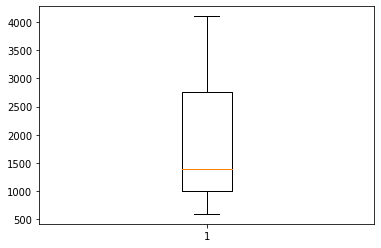

<Figure size 720x504 with 0 Axes>

In [258]:
arr=[]
arr=np.append(arr,s5['AmountPaid'])
plt.boxplot(arr)
fig=plt.figure(figsize=(10,7))
plt.show()

In [259]:
q1=np.quantile(arr,0.25)
q3=np.quantile(arr,0.75)
med=np.median(arr)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
print("IQR: ",iqr)
print("Upper bound: ",upper)
print("Lower bound: ",lower)

IQR:  1751.0
Upper bound:  5375.5
Lower bound:  -1628.5


Outliers are: []


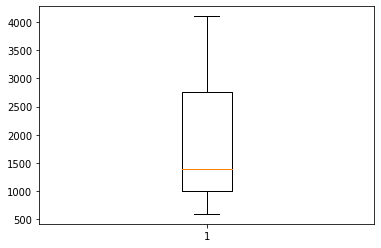

<Figure size 864x504 with 0 Axes>

In [260]:
outliers=arr[(arr<=lower) | (arr>=upper)]
print("Outliers are: {}".format(outliers))
corr=arr[(arr>=lower) & (arr<=upper)]
plt.boxplot(corr)
fig=plt.figure(figsize=(12,7))
plt.show()